# Priprava podatkov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("wos.xls")
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Wintzer-Wehekind, L; Moulis, L; Camus, M; Vanb...",NaN,NaN,NaN,"Wintzer-Wehekind, Leonard; Moulis, Lionel; Cam...",NaN,NaN,Prospective assessment of learning curve and i...,BMC MEDICAL EDUCATION,...,Science Citation Index Expanded (SCI-EXPANDED)...,Education & Educational Research,Z9B6K,40069701.0,NaN,NaN,NaN,2025-03-24,WOS:001441776100001,0
1,J,"Shiferaw, M; O'Hagan, KG; Weinstein, M",NaN,NaN,NaN,"Shiferaw, Menbere; O'Hagan, Kaitlyn G.; Weinst...",NaN,NaN,Staying Put: Positive Spillovers on Teacher Re...,EDUCATION AND URBAN SOCIETY,...,Social Science Citation Index (SSCI),Education & Educational Research; Urban Studies,W0C2A,NaN,NaN,NaN,NaN,2025-03-24,WOS:001415355100001,0
2,J,"Li, AY; Hu, XD",NaN,NaN,NaN,"Li, Amy Y.; Hu, Xiaodan",NaN,NaN,Goodbye Performance-Based Funding: Policy Aban...,RESEARCH IN HIGHER EDUCATION,...,Social Science Citation Index (SSCI),Education & Educational Research,O3L9U,NaN,NaN,NaN,NaN,2025-03-24,WOS:001370197800001,0
3,J,"Creps, R; Islem, S; Zeng, BR; Boatman, A; Sama...",NaN,NaN,NaN,"Creps, Ryan; Islem, Shadman; Zeng, Bingran; Bo...",NaN,NaN,Tech Equity: a Survival Analysis of an Undergr...,INNOVATIVE HIGHER EDUCATION,...,Emerging Sources Citation Index (ESCI),Education & Educational Research,T4M0A,NaN,NaN,NaN,NaN,2025-03-24,WOS:001404753700001,0
4,J,"Corradi, B; Espinosa, D; Rodríguez, C; Espinoz...",NaN,NaN,NaN,"Corradi, B.; Espinosa, D.; Rodriguez, C.; Espi...",NaN,NaN,Is Admission Enough? University Persistence of...,HIGHER EDUCATION POLICY,...,Social Science Citation Index (SSCI),Education & Educational Research,S0S3S,NaN,NaN,NaN,NaN,2025-03-24,WOS:001395427100001,0


In [2]:
df_TF = pd.read_csv("TF.csv")

# Display the first few rows
print(df_TF.head())

                                       Article title  \
0  Discrete-Time Survival Analysis Incorporating ...   
1  Application of Associative Discrete-Time Survi...   
2        Applying Kaplan-Meier to Item Response Data   
3  Survival analysis for Hispanic ELL students' a...   
4  Student psychological distress and degree drop...   

                                             Authors  \
0                 Kahyun Lee, Kejin Lee, Sooyong Lee   
1       Kahyun Lee, Sooyong Lee, Tiffany A Whittaker   
2                                     Daniel McNeish   
3                Mido Chang, Sunha Kim, Jeehyun Park   
4  Stefan Cvetkovski, Anthony F Jorm, Andrew J Ma...   

                                       Journal title  Volume Issue  \
0  Structural Equation Modeling: A Multidisciplin...     NaN   NaN   
1  Structural Equation Modeling: A Multidisciplin...    30.0     5   
2              The Journal of Experimental Education    86.0     2   
3  International Journal of Research & Method 

In [4]:
df_titles = set(df["Article Title"])
df_TF_titles = set(df_TF["Article title"])

# Find the intersection (common elements)
matching_titles = df_titles.intersection(df_TF_titles)

# Get the count of matching elements
matching_count = len(matching_titles)

print(f"Number of matching article titles: {matching_count}")

Number of matching article titles: 44


In [9]:
import pandas as pd
from rapidfuzz import process, fuzz

# Define a function to find close matches
def fuzzy_match_titles(df_titles, df_TF_titles, threshold=90):
    matches = []
    for title in df_titles:
        best_match, score, _ = process.extractOne(title, df_TF_titles, scorer=fuzz.ratio)
        if score >= threshold:
            matches.append((title, best_match, score))
    return matches

# Convert columns to sets for comparison
df_titles = set(df["Article Title"].dropna())  # Remove NaN values
df_TF_titles = set(df_TF["Article title"].dropna())

# Find fuzzy matches
matching_titles = fuzzy_match_titles(df_titles, df_TF_titles, threshold=90)

# Count the number of close matches
matching_count = len(matching_titles)

print(f"Number of approximately matching article titles: {matching_count}")

# Optionally print some matches
for match in matching_titles[:10]:  # Show first 10 matches
    print(f"DF: {match[0]}  <-->  DF_TF: {match[1]}  (Similarity: {match[2]}%)")


Number of approximately matching article titles: 48
DF: The enactment of reforms in state governance of higher education: Testing the political instability hypothesis  <-->  DF_TF: The Enactment of Reforms in State Governance of Higher Education: Testing the Political Instability Hypothesis  (Similarity: 91.81818181818183%)
DF: Survival analysis of unemployment duration: a case study of Vietnam  <-->  DF_TF: Survival analysis of unemployment duration: a case study of Vietnam  (Similarity: 100.0%)
DF: School-to-work transition of higher education graduates in four European countries  <-->  DF_TF: School-to-work transition of higher education graduates in four European countries  (Similarity: 100.0%)
DF: The effect of fields of study on the waiting time to employment: evidence from the National Graduate Survey of Canada 2005 and 2009/10 cohorts  <-->  DF_TF: The effect of fields of study on the waiting time to employment: evidence from the National Graduate Survey of Canada 2005 and 2009

Do sem

In [2]:
# Count the number of publications in 2014, 2015 and 2025
count_2014 = (df['Publication Year'] == 2014).sum()
count_2015 = (df['Publication Year'] == 2015).sum()
count_2017 = (df['Publication Year'] == 2017).sum()
count_2016 = (df['Publication Year'] == 2016).sum()
count_2025 = (df['Publication Year'] == 2025).sum()

# Remove rows where 'Publication Year' is 2015 or 2025
df = df[~df['Publication Year'].isin([2014, 2015, 2016, 2017, 2025])]

# Print results
print(f"Number of publications in 2014: {count_2014}")
print(f"Number of publications in 2015: {count_2015}")
print(f"Number of publications in 2016: {count_2016}")
print(f"Number of publications in 2017: {count_2017}")
print(f"Number of publications in 2025: {count_2025}")

#Delete not articles
original_rows = len(df)
df.drop(df[df["Document Type"] != 'Article'].index, inplace=True)

# Number of rows after filtering
filtered_rows = len(df)

# Calculate the number of rows deleted
rows_deleted = original_rows - filtered_rows

# Output the results
print(f"Original number of rows: {original_rows}")
print(f"Number of rows after filtering: {filtered_rows}")
print(f"Number of rows deleted: {rows_deleted}")

Number of publications in 2014: 1
Number of publications in 2015: 3
Number of publications in 2016: 1
Number of publications in 2017: 5
Number of publications in 2025: 5
Original number of rows: 277
Number of rows after filtering: 185
Number of rows deleted: 92


In [3]:
# Checking for duplicates in the 'Article Title' column
duplicate_titles = df[df.duplicated(subset='Article Title', keep=False)]

# Count the number of duplicates
num_duplicates = len(duplicate_titles)

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate entries based on 'Article Title'.")
    
    # Removing duplicates, keeping only the first occurrence
    df_cleaned = df.drop_duplicates(subset='Article Title', keep='first')
    
    # Number of entries removed
    entries_removed = len(df) - len(df_cleaned)
    print(f"{entries_removed} duplicate entries removed from the DataFrame.")
else:
    print("No duplicate entries found in the 'Article Title' column.")

# Updating the DataFrame after removing duplicates
df = df_cleaned if num_duplicates > 0 else df

Found 2 duplicate entries based on 'Article Title'.
1 duplicate entries removed from the DataFrame.


In [4]:
columns_to_save = ["Authors", "Article Title", "DOI", "DOI Link"]
df_analiza = df[columns_to_save]

# Filter out the row with the specific "Article Title" Because it has expression of concern
#df_analiza = df_analiza[df_analiza["Article Title"] != "Stacked KNN with hard voting predictive approach to assist hiring process in IT organizations (Publication with Expression of Concern)"]

# Save the filtered DataFrame to an Excel file
df_analiza.to_excel("df_analiza.xlsx", index=False)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borbr\AppData\Local\Temp\ipykernel_7008\3647661147.py:4: SyntaxWarning: invalid escape sequence '\s'
  df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)


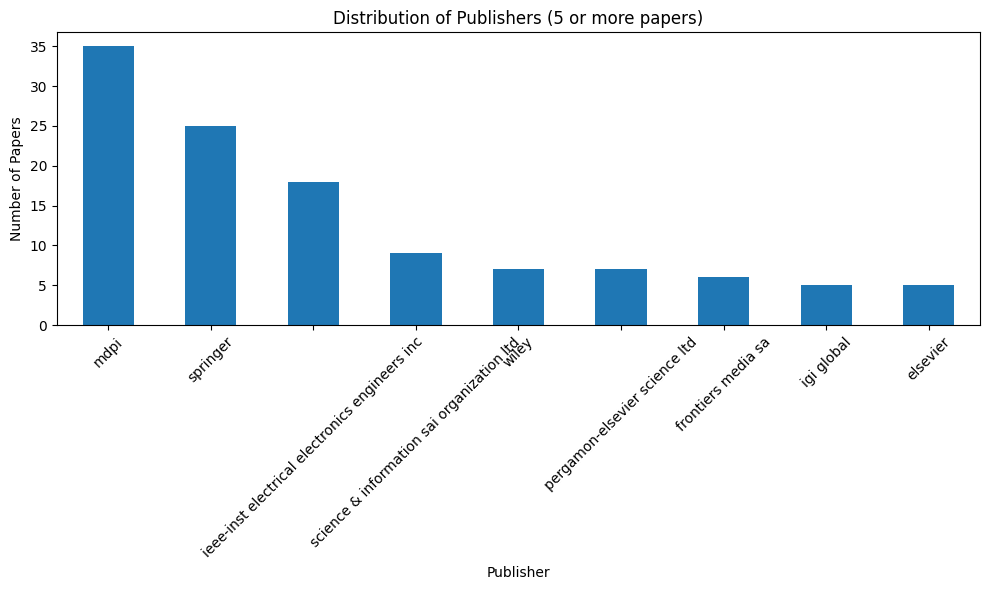

In [5]:
df['Publisher'] = df['Publisher'].str.strip().str.lower().replace('', 'unknown').fillna('unknown')

# 2. Replace non-breaking spaces or other special whitespace characters
df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)

# Calculate the counts of each publisher
publisher_counts = df['Publisher'].value_counts()

# Filter to include only publishers with 5 or more occurrences
filtered_publisher_counts = publisher_counts[publisher_counts >= 5]

# Plotting the distribution
plt.figure(figsize=(10, 6))
filtered_publisher_counts.plot(kind='bar')
plt.title('Distribution of Publishers (5 or more papers)')
plt.xlabel('Publisher')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [7]:
# Descriptive statistics for Cited Reference Count
cited_reference_stats = df['Cited Reference Count'].describe()
print(cited_reference_stats)


count    184.000000
mean      47.157609
std       20.385952
min        9.000000
25%       34.000000
50%       44.000000
75%       56.000000
max      143.000000
Name: Cited Reference Count, dtype: float64


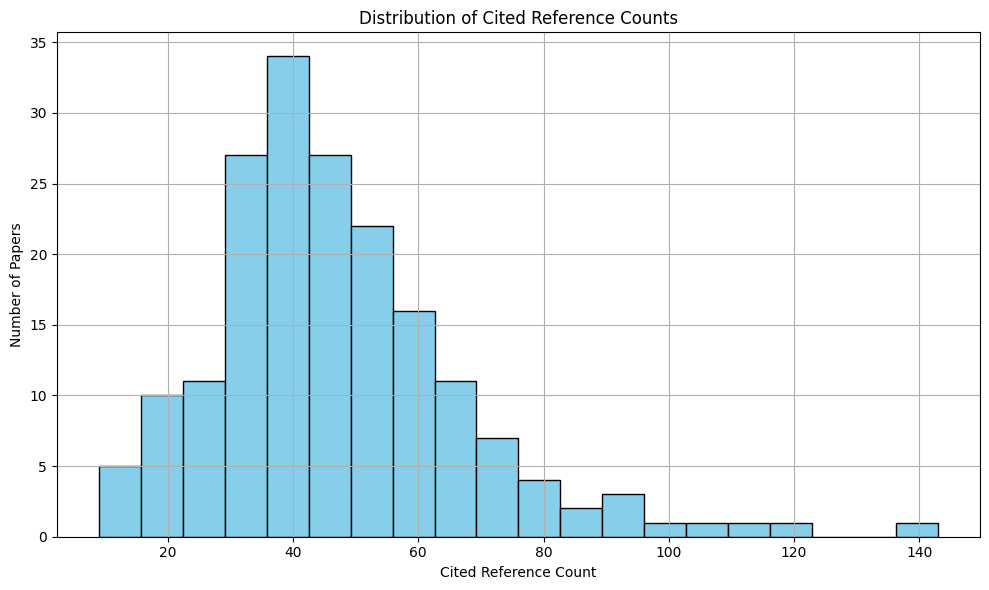

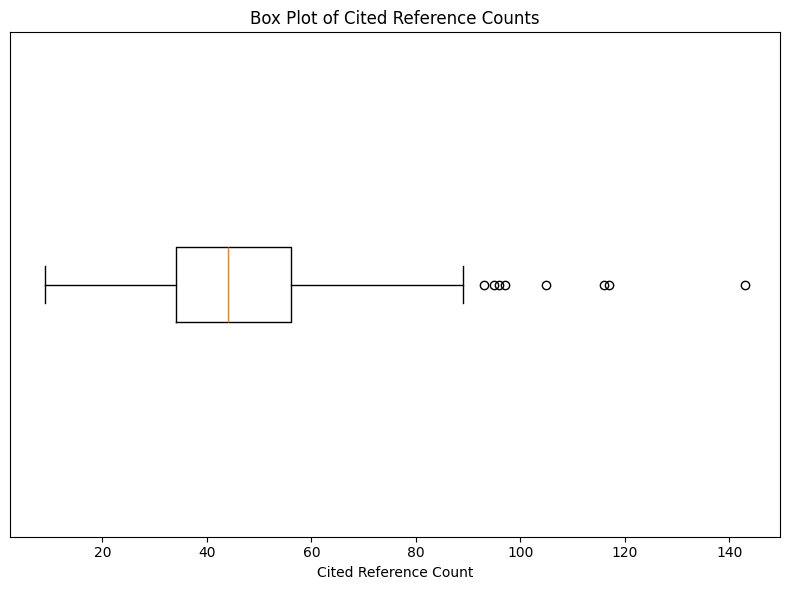

Average Cited Reference Count: 47.16
Standard Deviation of Cited Reference Count: 20.39


In [8]:
import matplotlib.pyplot as plt

# Histogram for Cited Reference Count
plt.figure(figsize=(10, 6))
plt.hist(df['Cited Reference Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cited Reference Counts')
plt.xlabel('Cited Reference Count')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot for Cited Reference Count
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cited Reference Count'].dropna(), vert=False)
plt.title('Box Plot of Cited Reference Counts')
plt.xlabel('Cited Reference Count')

# Removing the y-axis ticks and label
plt.yticks([])
plt.tight_layout()
plt.show()

# Calculate and output the average and standard deviation of the Cited Reference Count
average_cited_reference_count = df['Cited Reference Count'].mean()
std_cited_reference_count = df['Cited Reference Count'].std()

print(f"Average Cited Reference Count: {average_cited_reference_count:.2f}")
print(f"Standard Deviation of Cited Reference Count: {std_cited_reference_count:.2f}")


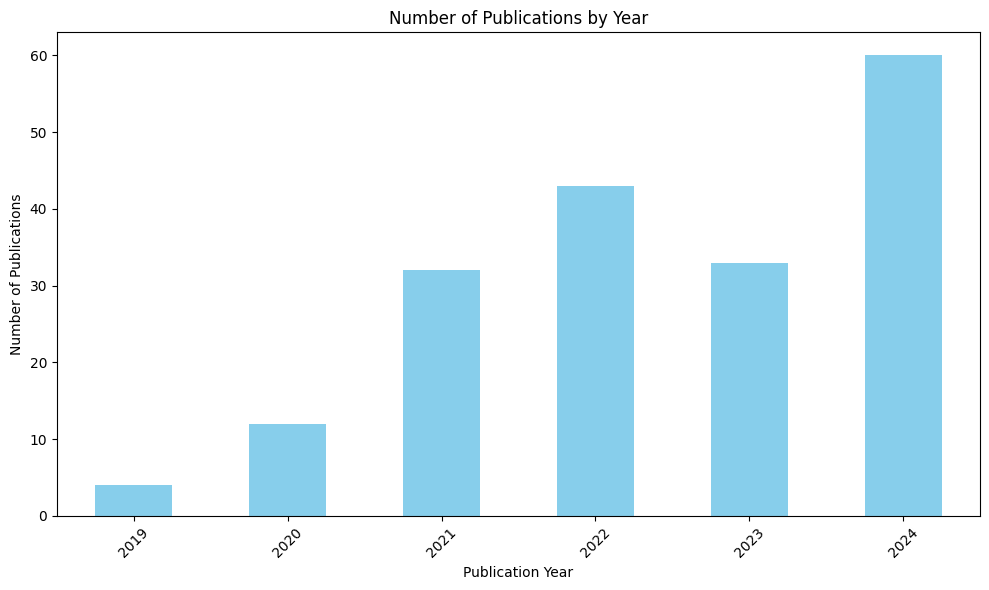

In [9]:
import matplotlib.pyplot as plt

# Count publications by year
publications_per_year = df['Publication Year'].value_counts().sort_index()

# Plotting the number of publications by year
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Publications by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


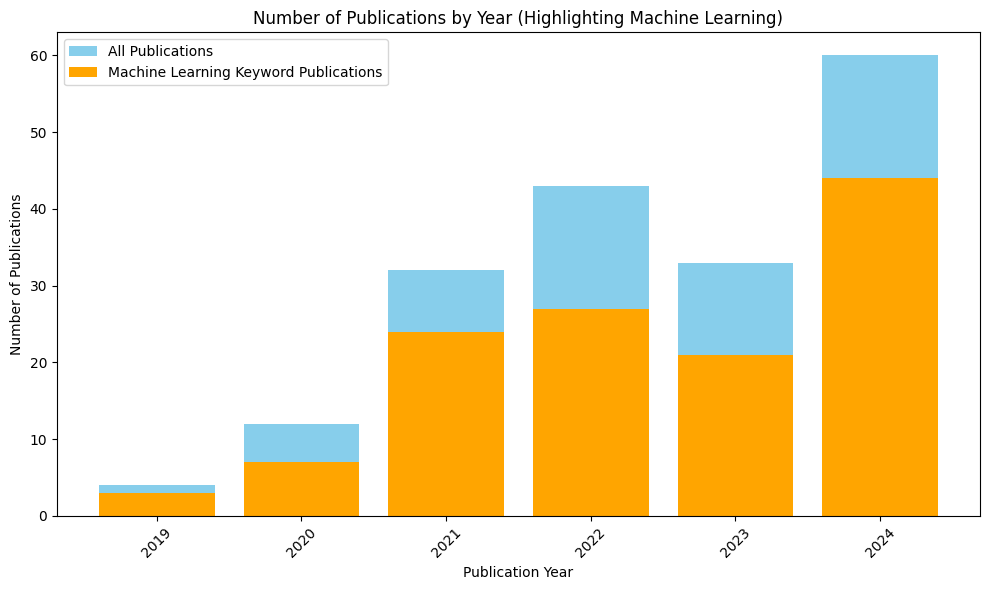

In [10]:
# Filter rows with 'machine learning' in 'Author Keywords'
df['Author Keywords'] = df['Author Keywords'].fillna('').str.lower()
ml_publications_per_year = df[df['Author Keywords'].str.contains('machine learning')]['Publication Year'].value_counts().sort_index()

# Plotting the advanced bar chart
plt.figure(figsize=(10, 6))

# Bar chart for all publications
plt.bar(publications_per_year.index, publications_per_year.values, color='skyblue', label='All Publications')

# Bar chart for publications with 'machine learning' keyword
plt.bar(ml_publications_per_year.index, ml_publications_per_year.values, color='orange', label='Machine Learning Keyword Publications')

plt.title('Number of Publications by Year (Highlighting Machine Learning)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


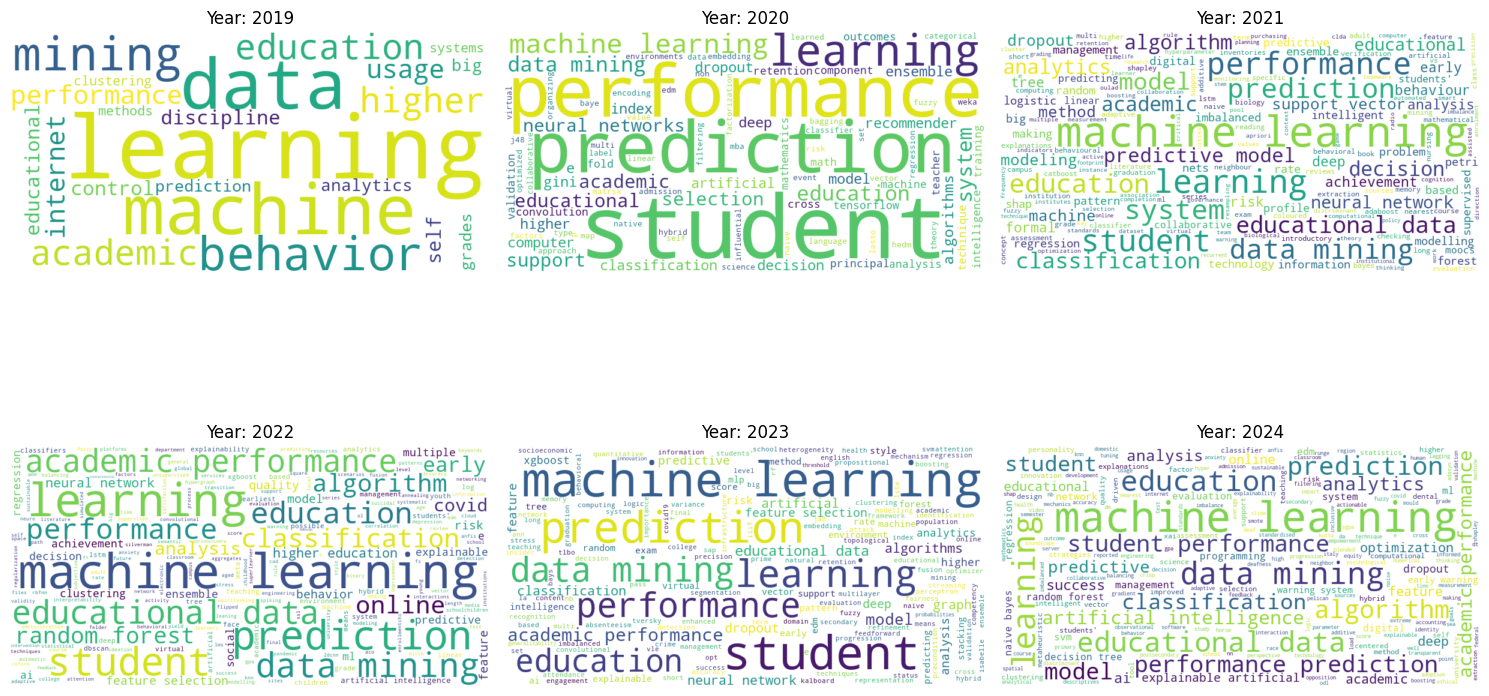

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter out the years 2015 and 2025
filtered_df = df

# Group data by 'Publication Year' and concatenate all author keywords for each year
year_keywords_dict = filtered_df.groupby('Publication Year')['Author Keywords'].apply(lambda x: ' '.join(x.dropna())).to_dict()

# Determine the number of unique years for subplot layout
num_years = len(year_keywords_dict)
rows = 2
cols = (num_years + 1) // 2  # Calculate the number of columns needed

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate word cloud for each year and plot in the corresponding subplot
for i, (year, keywords) in enumerate(sorted(year_keywords_dict.items())):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

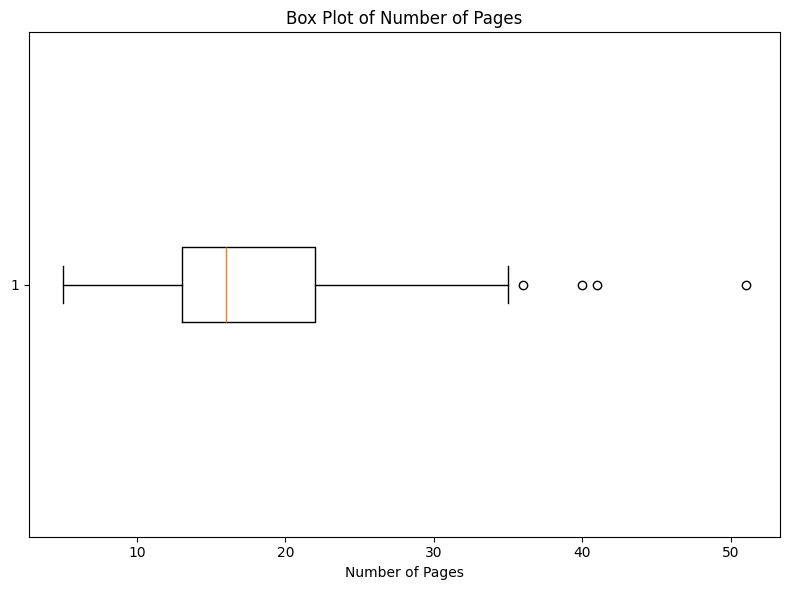

In [12]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Number of Pages' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Number of Pages'].dropna(), vert=False)
plt.title('Box Plot of Number of Pages')
plt.xlabel('Number of Pages')
plt.tight_layout()
plt.show()


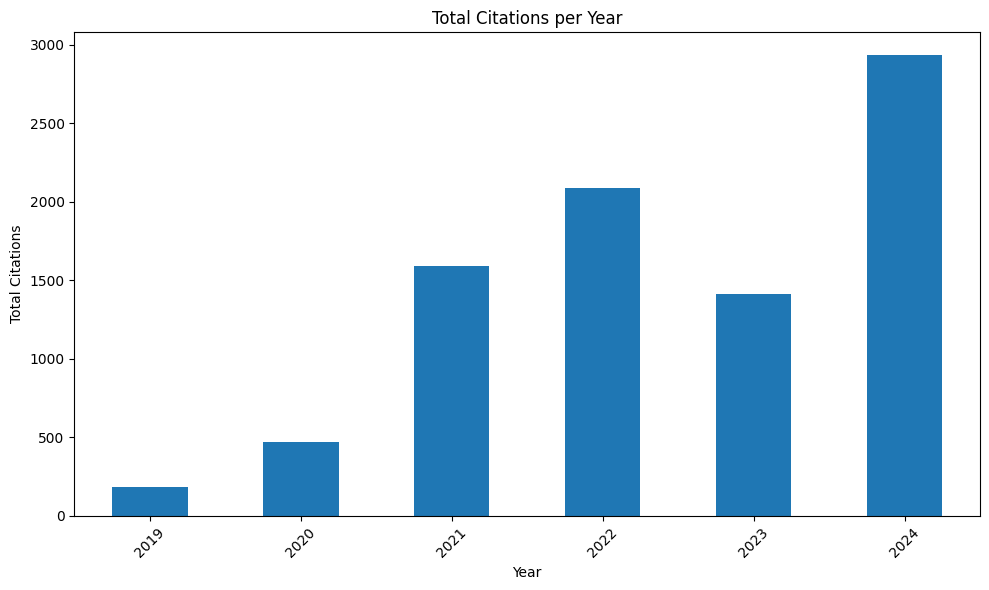

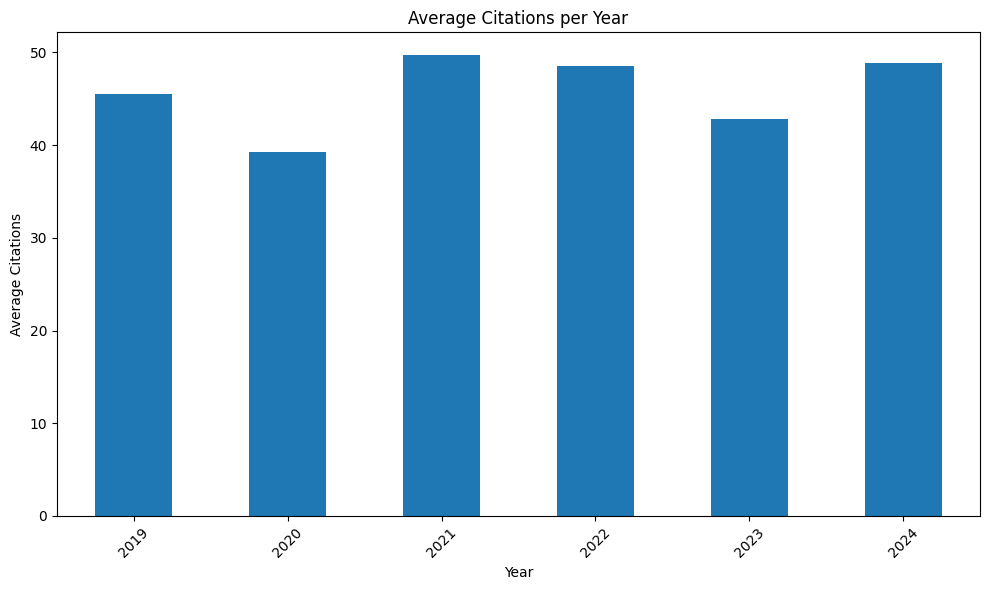

In [13]:

# Grouping by 'Publication Year' and calculating the sum of citations per year
citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].sum()

# Plotting the citations per year
plt.figure(figsize=(10, 6))
citations_per_year.plot(kind='bar')
plt.title('Total Citations per Year')
plt.xlabel('Year')
plt.ylabel('Total Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you want to calculate the average citations per year instead
average_citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].mean()

# Plotting the average citations per year
plt.figure(figsize=(10, 6))
average_citations_per_year.plot(kind='bar')
plt.title('Average Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Regression equation: y = 0.54x + -1049.29
R^2: 0.00
Mean Squared Error: 412.77


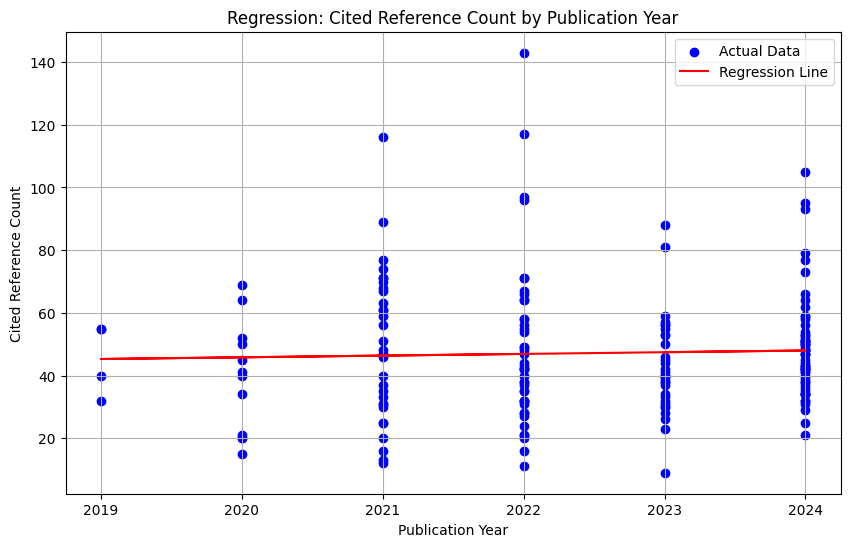

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Regression analysis: 'Cited Reference Count' by 'Publication Year'
X = df[['Publication Year']].values
y = df['Cited Reference Count'].values

# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Regression output
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
predictions = regression_model.predict(X)
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"Regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('Regression: Cited Reference Count by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Cited Reference Count')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df_most_citations = df.nlargest(10, 'Cited Reference Count')

# Output the new DataFrame
#print("Articles with the highest 'Cited Reference Count':")
df_most_citations= df_most_citations

In [16]:
df_most_citations.head()
df_most_citations.to_excel('output_most citations.xlsx', index=False)